## 数据分析入门报告
蔡克梅
2017-6-1

感兴趣的问题：  
有多少人从灾难中获生，生还率是多少？   
哪些因素可以让船上的人生还率更高？ 

操作步骤：  
1)数据载入  
从csv中读取数据  
找出缺失值  
获取基础统计结果  

2)数据可视化  
生还率和性别的关系  
生还率和乘客等级的关系  
生还率和年龄的关系  
生还率和亲人人数(SipSb&Parch)的关系    
生还率和票价的关系  
生还率和登船点的关系  

## 从csv中读取数据

In [257]:
# 用于读取数据
import pandas as pd
# 用于数学计算
import numpy as np
# 用于可视化数据
import matplotlib.pyplot as plt
# 用户美化绘图
import seaborn as sns

In [258]:
# 读取泰坦尼克号数据，并创建 pandas dataframe
titanic_df = pd.read_csv('titanic_data.csv')
# 查看前5行数据
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 查找缺失值

In [259]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

"Age"、"Cabin"和"Embarked"有缺失值  
"Age"缺失值用平均数来填充  
"Cabin"，缺失值太多，不做分析  
"Embarked"，检查其和其他变量的关系，再猜测缺失值

In [260]:
# 用平均数填充"Age"缺失值
mean_age = titanic_df['Age'].mean()
titanic_df['Age'] = titanic_df['Age'].fillna(mean_age)

In [261]:
#检查缺失“Embarked”值的乘客
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


“PassengerId” 为62和830的乘客缺失“Embarked”值  
这两个乘客“Pclass”、“Ticket”、“Fare”和“Carbin”都一致  
为猜测票价80的一级乘客的登船点，绘制在各登船点各级乘客船票价格的线箱图

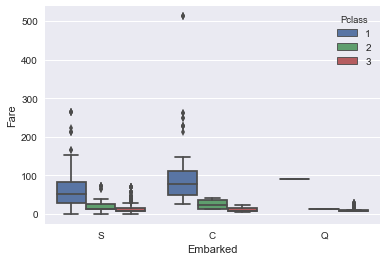

In [262]:
sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=titanic_df)

从图中可以看出“C”登船点票价中位数在80左右，猜测62和830乘客的"Embarked"为“C”

In [263]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('C')

## 获取基础统计结果

In [264]:
# 用decribe方法获取titanic_df基础统计信息
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 可视化

In [265]:
# titanic_df.hist(figsize=(12, 9))

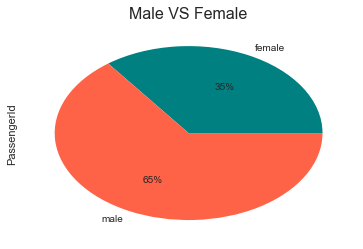

In [266]:
# 男女人数占比饼图
titanic_df.groupby('Sex')['PassengerId'].count().plot(kind='pie', autopct='%.0f%%', colors=['teal', 'tomato'])
plt.title('Male VS Female', fontsize=16)
plt.show()

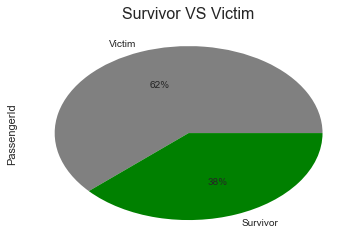

In [267]:
# 生还人数和死亡人数占比饼图
titanic_df.groupby('Survived')['PassengerId'].count().plot(kind='pie', autopct='%.0f%%', labels=['Victim', 'Survivor'], colors=['gray', 'green'])
plt.title('Survivor VS Victim', fontsize=16)
plt.show()

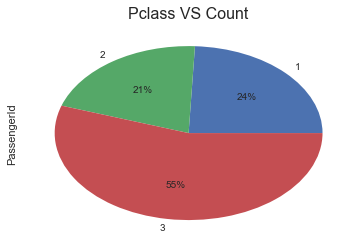

In [268]:
# 各等级乘客人数占比
titanic_df.groupby('Pclass')['PassengerId'].count().plot(kind='pie', autopct='%.0f%%')
plt.title('Pclass VS Count', fontsize=16)
plt.show()

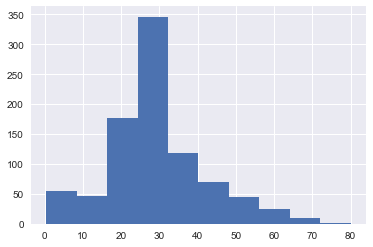

In [269]:
# 乘客年纪分布柱状图
titanic_df['Age'].hist()

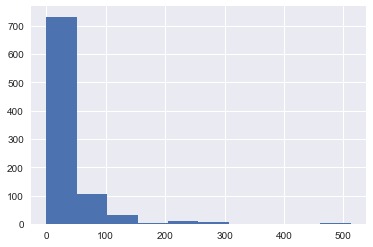

In [270]:
# 乘客船票价格分布柱状图
titanic_df['Fare'].hist()

## 生还率和性别的关系

In [271]:
# 计算有多少人生还
titanic_df['Survived'].sum()

342L

In [272]:
# 将数据按"Sex"分组，计算每一组生还的平均值，得出男性生还率和女性生还率
survival_rate_by_sex = titanic_df.groupby('Sex')['Survived'].mean()
print survival_rate_by_sex 

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


(0, 1)

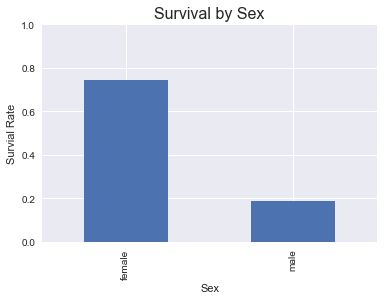

In [273]:
#生还率和性别关系柱状图
survival_rate_by_sex.plot(kind='bar')
plt.title('Survival by Sex', fontsize=16) 
plt.xlabel('Sex')
plt.ylabel('Survial Rate')
plt.ylim(0, 1)

#### 女性生还率明显高于男性近3倍，这种现象在各等级乘客中都相似吗？

## 生还率和等级的关系

In [274]:
# 将数据按"Pclass"分组，计算每一组生还的平均值
survival_rate_by_pclass = titanic_df.groupby('Pclass')['Survived'].mean()
print survival_rate_by_pclass

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


(0, 1)

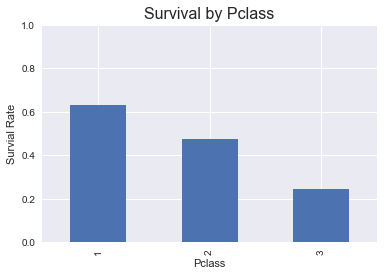

In [275]:
# 生还率和乘客等级关系柱状图
survival_rate_by_pclass.plot(kind='bar')
plt.title('Survival by Pclass', fontsize=16) 
plt.xlabel('Pclass')
plt.ylabel('Survial Rate')
plt.ylim(0, 1)

#### 从图中可以看出，生还率按乘客等级递减，等级越高，生还率越高

## 生还率和性别、等级的关系

In [276]:
# 将数据按“Pclass”分组，计算各等级有多少乘客
titanic_df.groupby('Pclass').count()['PassengerId']

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [277]:
# 将数据按“Sex”和“Pclass”分组，计算不同性别不同等级的生还率
survival_rate_by_sex_pclass = titanic_df.groupby(['Sex', 'Pclass'])['Survived'].mean()
print survival_rate_by_sex_pclass

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


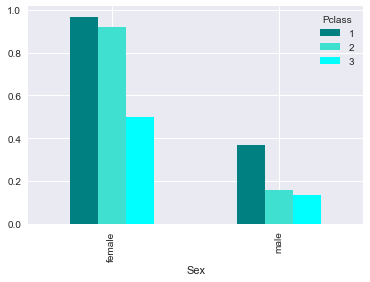

In [278]:
survival_rate_by_sex_pclass.unstack().plot(kind='bar', colors=['teal', 'turquoise', 'aqua'])


#### 从图中可以看出，在各等级乘客中，女性生还率都明显比男性高，且无论男女，等级越高，生还率越高

## 生还率和年龄的关系

In [279]:
# 创建新的一列，储存乘客的年龄范围
bins = np.arange(0, 80, 10)
titanic_df['Age_group'] = pd.cut(titanic_df['Age'], bins)
# 将"Age_group"分组，并计算各年龄段的生还率
survival_rate_by_age_bracket = titanic_df.groupby(['Age_group'])['Survived'].mean()
print survival_rate_by_age_bracket

Age_group
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.334152
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
Name: Survived, dtype: float64


(0, 1)

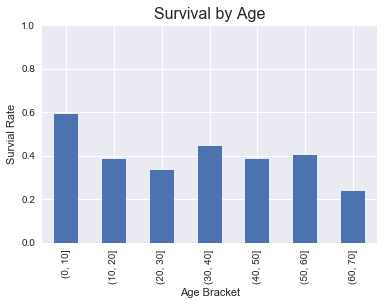

In [280]:
# 生还率和年龄段关系柱形图
survival_rate_by_age_bracket.plot(kind='bar')
plt.title('Survival by Age', fontsize=16) 
plt.xlabel('Age Bracket')
plt.ylabel('Survial Rate')
plt.ylim(0, 1)

#### 从图中可以看出0-10岁的乘客生还率比其他年龄段更高

## 生还率和性别、年龄的关系

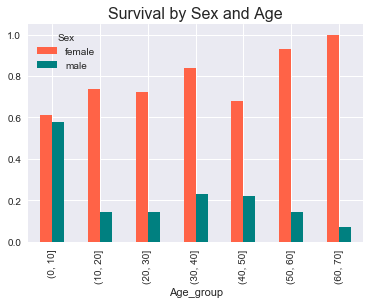

In [281]:
titanic_df.groupby(['Age_group', 'Sex'])['Survived'].mean().unstack().plot(kind='bar', colors=['tomato', 'teal'])
plt.title('Survival by Sex and Age', fontsize=16) 
plt.show()


#### 在灾难去世的男性年纪集中在20岁-40岁之间，猜测这可能因为“女人、小孩优先”的救援原则

## 生还率和SibSp&Parch的关系

In [282]:
# 创建列SibSp_Parch，储存每个乘客'SibSp'、'Parch'之和
titanic_df['SibSp_Parch'] = titanic_df['SibSp'] + titanic_df['Parch']

# 将titanic_df按“SibSp_Parch”分组，计算每组的生还率
survival_rate_by_sibsp_parch = titanic_df.groupby('SibSp_Parch')['Survived'].mean()
print survival_rate_by_sibsp_parch

SibSp_Parch
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


(0, 1)

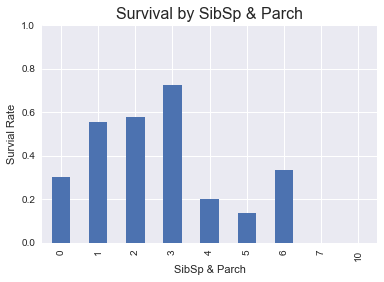

In [283]:
# 生还率和SibSp&Parch关系柱形图
survival_rate_by_sibsp_parch.plot(kind='bar')
plt.title('Survival by SibSp & Parch', fontsize=16) 
plt.xlabel('SibSp & Parch')
plt.ylabel('Survial Rate')
plt.ylim(0, 1)

#### 3人结伴，生还率最高

## 生还率和票价的关系

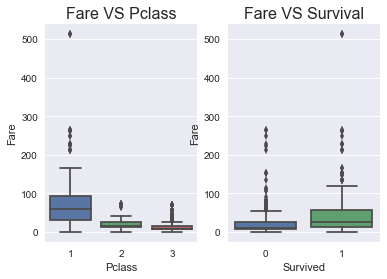

In [284]:
# 用线箱图查看各等级票价分布情况
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Fare VS Pclass', fontsize=16)
ax1.set_ylabel('Fare')
ax2.set_title('Fare VS Survival', fontsize=16)
ax2.set_ylabel('Fare')
sns.boxplot(x='Pclass', y='Fare', data=titanic_df, ax=ax1)
sns.boxplot(x='Survived', y='Fare', data=titanic_df, ax=ax2)

从图中可以看出一级乘客票价集中在30-100之间，生还者船票集中在20-60之间  
船票价格在180以上的乘客较少，以下分析不考虑这些极值

In [285]:
# 创建新的一列，储存船票价格范围
bins = np.arange(0, 200, 20)
titanic_df['Fare_group'] = pd.cut(titanic_df['Fare'], bins)
# 将"Age_group"分组，并计算各年龄段的生还率
survival_rate_by_fare = titanic_df.groupby(['Fare_group'])['Survived'].mean()
print survival_rate_by_fare

Fare_group
(0, 20]       0.284000
(20, 40]      0.430000
(40, 60]      0.574074
(60, 80]      0.520833
(80, 100]     0.857143
(100, 120]    0.733333
(120, 140]    0.857143
(140, 160]    0.666667
(160, 180]    1.000000
Name: Survived, dtype: float64


(0, 1)

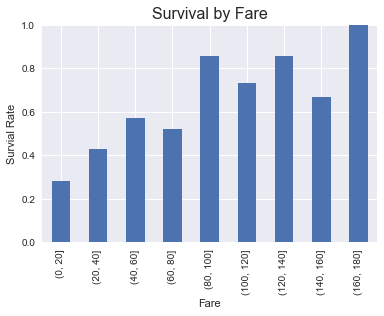

In [286]:
# 生还率和票价关系的直方图
survival_rate_by_fare.plot(kind='bar')
plt.title('Survival by Fare', fontsize=16) 
plt.xlabel('Fare')
plt.ylabel('Survial Rate')
plt.ylim(0, 1)

#### 票价越高，生还率越高，票价高低会不会体现在性别和的乘客等级方面？

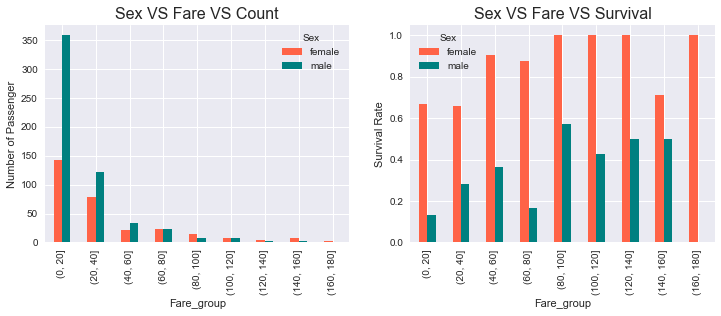

In [287]:
# 绘制票价、性别和生还率关系柱状图
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Sex VS Fare VS Count', fontsize=16)
ax1.set_ylabel('Number of Passenger')
ax2.set_title('Sex VS Fare VS Survival', fontsize=16)
ax2.set_ylabel('Survival Rate')
titanic_df.groupby(['Fare_group', 'Sex'])['Survived'].count().unstack().plot(kind='bar', color=['tomato', 'teal'], figsize=(12,4), ax=ax1)
titanic_df.groupby(['Fare_group', 'Sex'])['Survived'].mean().unstack().plot(kind='bar', color=['tomato', 'teal'], figsize=(12,4), ax=ax2)


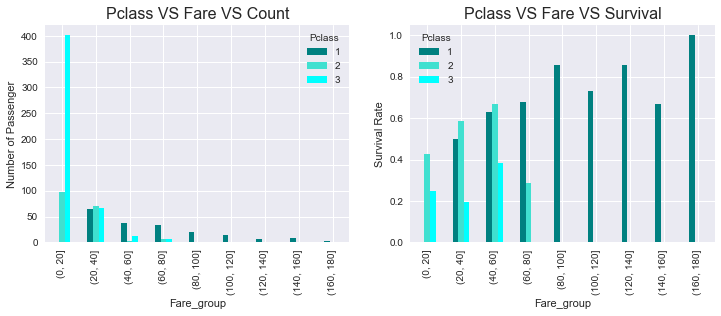

In [288]:
# 绘制票价、等级和生还率关系柱状图
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Pclass VS Fare VS Count', fontsize=16)
ax1.set_ylabel('Number of Passenger')
ax2.set_title('Pclass VS Fare VS Survival', fontsize=16)
ax2.set_ylabel('Survival Rate')
titanic_df.groupby(['Fare_group', 'Pclass'])['Survived'].count().unstack().plot(kind='bar', color=['teal', 'turquoise', 'aqua'], figsize=(12,4), ax=ax1)
titanic_df.groupby(['Fare_group', 'Pclass'])['Survived'].mean().unstack().plot(kind='bar', color=['teal', 'turquoise', 'aqua'], figsize=(12,4), ax=ax2)

#### 从图中可以看出，票价在80以上多为1级乘客，且多为女性

## 生还率和上传地点的关系

In [289]:
# 将数据按“Embarked”分组，计算每组的存活率
survival_rate_by_embarked = titanic_df.groupby('Embarked')['Survived'].mean()
print survival_rate_by_embarked

Embarked
C    0.558824
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


(0, 1)

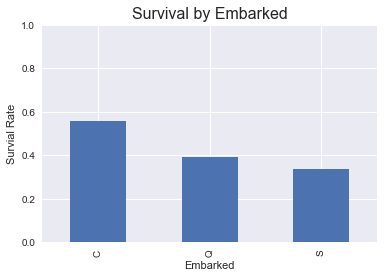

In [290]:
# 生还率和上传地点的关系柱形图
survival_rate_by_embarked.plot(kind='bar')
plt.title('Survival by Embarked', fontsize=16) 
plt.xlabel('Embarked')
plt.ylabel('Survial Rate')
plt.ylim(0, 1)

#### 生还率按 C、Q、S三个登船点递减，但差别不是很明显，会不会也和性别因素和等级因素有关系？

In [291]:
# 将数据按"Embarked"和“Sex”分组，计算各组人数
titanic_df.groupby(['Embarked', 'Sex'])['Survived'].count()

Embarked  Sex   
C         female     75
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: Survived, dtype: int64

In [292]:
# 将数据按"Embarked"和“Pclass”分组，计算各组人数
titanic_df.groupby(['Embarked', 'Pclass'])['Survived'].count()

Embarked  Pclass
C         1          87
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: Survived, dtype: int64

#### S登船点，男性是女性人数的2倍多，因男性生还率较低，可能造成S登船点生还率比较低。
#### C登船点，1级乘客的比例较多，因1级乘客生还率较高，可能造成C登船点生还率较高。

## 综上所述：
1）共有342人生还，生还率是38%。  
2）生还率和性别关系：女性生还率高于男性。  
3）生还率和等级关系：等级越高，生还率越高。  
4）生还率和年龄关系：0-10岁年龄段的乘客生还率高于其他年龄段乘客。  
5）生还率和亲人人数关系：3个亲人结伴的乘客生还率最高。  
6）生还率和票价关系：票价越高，生还率越高。不过80以上的票价多为1级乘客且多为女性。  
7）生还率和登船点的关系：按 C、Q、S三个登船点递减。S登船点，男性乘客比例较高，C登船点，1级乘客的比例较高。  
8）影响生还率的因素有：性别、年龄和乘客等级。猜测灾难逃离时，女人和小孩优先逃离，1级乘客优先逃离。  

titanic共有1324乘客和892名甲板工作人员，报告中采用了891个乘客样本，样本数量足够多，但抽样方法未知，分析结果可能有偏差。
因年龄的缺失值较多，分析时只是简单地用样本年龄均值来填充，可能造成生还率和年龄关系不准确。
生还率可能还跟乘客所处甲板位置有关系，但缺少数据。